In [1]:
#데이터 핸들링 라이브러리
import pandas as pd
import numpy as np
#데이터 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({'font.family':'AppleGothic'})
mpl.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

## 용어 정리
- Imbalance 정도
    - Slight Imbalance: An imbalanced classification problem where the distribution of examples is uneven by a small
    amount in the training dataset (e.g. 4:6)
    - Severe Imbalance: An imbalanced classification problem where the distribution of examples is uneven by a large
    amount in the training dataset (e.g. 1:100 or more)
- class의 분류
    - Majority Class: The class (or classes) in an imbalanced classification predictive modeling problem that has
    many examples. (여기선 사망하지 않음(0))
    - Minority Class: The class in an imbalanced classification predictive modeling problem that has few examples.
    (여기선 사망함(1))

- Imbalance Classification 예
    - Fraud Detection.
    - Claim Prediction
    - Default Prediction.
    - Churn Prediction.
    - Spam Detection.
    - Anomaly Detection.
    - Outlier Detection.
    - Intrusion Detection
    - Conversion Prediction.

### Imbalance Classification에서 정확도accuracy가 좋은 척도일까?
- 아님!
- 만약 1000명중 한 명이 걸리는 회귀병이 있는데 잠복기동안 아무 증상이 없다 갑자기 죽는 병이라 하자.
    - 이 병을 밝힐 수 있는 장치는 진단기 A밖에 없다. 고 하자 이 진단기 A가 어느날 고장이 나서 무조건 음성판정만을 내렸다고 하자.
    - 그리고 이 고장난 사실을 아무도 모른채 계속 사용되었다고 하자. 이 기계는 999/1000의 높은 정확도를 가진 기계였지만, 회귀병을 탐지한다는 기계 본래의 목적에는 전혀 부합하지 못한 고철덩어리에 불과했던 것이다 (비유 출처: 본인)
    - 양성인 사실을 놓치는 것이 심각한 생명,신체상의 손해를 끼칠수 있는 경우 정확도accuracy가 높은것 보다도 재현율recall(실제 양성인 경우에서 양성이라 판정되는 비율)이 더 중요하다 볼수 있다
    - [참고](https://en.wikipedia.org/wiki/Accuracy_paradox)
### 레퍼런스
- [imbalanced classification](https://machinelearningmastery.com/what-is-imbalanced-classification/)

## 데이터 전처리 계획
1. 데이터 불러오기, 결측치 처리하기
2. 상대적으로 중요성이 떨어져보이는 피처 삭제, 필요하면 피처명을 직관적으로 다시 네이밍하기
3. 비숫자-문자열 독립변수 인코딩하기
4. 데이터 정규화
5. 훈련-테스트셋 분리

## 모델 학습 계획
1. 모델 생성
2. Cross_validation을 통한 모델학습
3. Accuracy, Precision,Recall, ROC 4개의 지표로 분류모델의 정확도 평가하기

In [2]:
from preprocessing_data import f1_read
df= f1_read()
df

데이터 불러오기 및 통합에 걸린 시간은 60.05191206932068 입니다


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100011,2020년 1월 1일 00시,수요일,대구광역시 달서구 죽전동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,70세,상해없음,이륜,남,18세,중상
1,2020010100100048,2020년 1월 1일 02시,수요일,대구광역시 달서구 송현동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,원동기,남,50세,상해없음,승용,남,26세,경상
2,2020010100100071,2020년 1월 1일 05시,수요일,대구광역시 북구 대현동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,기타불명,기타불명,미분류,기타불명,승용,남,37세,경상
3,2020010100100072,2020년 1월 1일 05시,수요일,대구광역시 중구 삼덕동1가,경상사고,0,0,1,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승용,남,18세,상해없음,보행자,남,21세,경상
4,2020010100100087,2020년 1월 1일 06시,수요일,대구광역시 수성구 두산동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,45세,상해없음,승용,남,26세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412779,2021123100100475,2021년 12월 31일 18시,금요일,울산광역시 북구 호계동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,33세,상해없음,보행자,남,65세,중상
412780,2021123100100476,2021년 12월 31일 18시,금요일,울산광역시 북구 중산동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,38세,상해없음,승용,남,32세,경상
412781,2021123100100477,2021년 12월 31일 18시,금요일,울산광역시 북구 진장동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,71세,상해없음,승용,여,30세,경상
412782,2021123100100593,2021년 12월 31일 21시,금요일,울산광역시 남구 야음동,경상사고,0,0,1,0,차대차 - 후진중충돌,...,맑음,단일로 - 기타,승용,남,28세,상해없음,이륜,남,17세,경상


In [3]:
"""
결측치 확인하기 => 피해운전자의 차종,성별,연령,상해정도를 파악하지 못하는 데이터가 16704건이 존재함
원본데이터 412784에 비하면 삭제해도 학습에 영향력을 크게 미치지 못할 뿐더러, 이러한 데이터들이
특정 편향성을 갖고 존재할 것이라 보기 어렵다(아마도 기록 누락에 의해 이러한 데이터가 존재할 것이기 때문)
그렇기 때문에 데이터를 제거해도 될것이라 판단하였음
"""
from preprocessing_data import f2_removeNaN
df= f2_removeNaN(df)
df

사고번호              0
사고일시              0
요일                0
시군구               0
사고내용              0
사망자수              0
중상자수              0
경상자수              0
부상신고자수            0
사고유형              0
법규위반              0
노면상태              0
기상상태              0
도로형태              0
가해운전자 차종          0
가해운전자 성별          0
가해운전자 연령          0
가해운전자 상해정도        0
피해운전자 차종      16704
피해운전자 성별      16706
피해운전자 연령      16704
피해운전자 상해정도    16706
dtype: int64


,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100011,2020년 1월 1일 00시,수요일,대구광역시 달서구 죽전동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,70세,상해없음,이륜,남,18세,중상
1,2020010100100048,2020년 1월 1일 02시,수요일,대구광역시 달서구 송현동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,원동기,남,50세,상해없음,승용,남,26세,경상
2,2020010100100071,2020년 1월 1일 05시,수요일,대구광역시 북구 대현동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,기타불명,기타불명,미분류,기타불명,승용,남,37세,경상
3,2020010100100072,2020년 1월 1일 05시,수요일,대구광역시 중구 삼덕동1가,경상사고,0,0,1,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승용,남,18세,상해없음,보행자,남,21세,경상
4,2020010100100087,2020년 1월 1일 06시,수요일,대구광역시 수성구 두산동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,45세,상해없음,승용,남,26세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412779,2021123100100475,2021년 12월 31일 18시,금요일,울산광역시 북구 호계동,중상사고,0,1,0,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,33세,상해없음,보행자,남,65세,중상
412780,2021123100100476,2021년 12월 31일 18시,금요일,울산광역시 북구 중산동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승용,남,38세,상해없음,승용,남,32세,경상
412781,2021123100100477,2021년 12월 31일 18시,금요일,울산광역시 북구 진장동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,71세,상해없음,승용,여,30세,경상
412782,2021123100100593,2021년 12월 31일 21시,금요일,울산광역시 남구 야음동,경상사고,0,0,1,0,차대차 - 후진중충돌,...,맑음,단일로 - 기타,승용,남,28세,상해없음,이륜,남,17세,경상


In [4]:
#데이터 데이터타입, 데이터갯수 확인하기
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396078 entries, 0 to 412783
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사고번호        396078 non-null  int64 
 1   사고일시        396078 non-null  object
 2   요일          396078 non-null  object
 3   시군구         396078 non-null  object
 4   사고내용        396078 non-null  object
 5   사망자수        396078 non-null  int64 
 6   중상자수        396078 non-null  int64 
 7   경상자수        396078 non-null  int64 
 8   부상신고자수      396078 non-null  int64 
 9   사고유형        396078 non-null  object
 10  법규위반        396078 non-null  object
 11  노면상태        396078 non-null  object
 12  기상상태        396078 non-null  object
 13  도로형태        396078 non-null  object
 14  가해운전자 차종    396078 non-null  object
 15  가해운전자 성별    396078 non-null  object
 16  가해운전자 연령    396078 non-null  object
 17  가해운전자 상해정도  396078 non-null  object
 18  피해운전자 차종    396078 non-null  object
 19  피해운전자 성별    396078 non-

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100011,2020년 1월 1일 00시,수요일,대구광역시 달서구 죽전동,중상사고,0,1,0,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,70세,상해없음,이륜,남,18세,중상
1,2020010100100048,2020년 1월 1일 02시,수요일,대구광역시 달서구 송현동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,원동기,남,50세,상해없음,승용,남,26세,경상
2,2020010100100071,2020년 1월 1일 05시,수요일,대구광역시 북구 대현동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,기타불명,기타불명,미분류,기타불명,승용,남,37세,경상
3,2020010100100072,2020년 1월 1일 05시,수요일,대구광역시 중구 삼덕동1가,경상사고,0,0,1,0,차대사람 - 길가장자리구역통행중,...,맑음,단일로 - 기타,승용,남,18세,상해없음,보행자,남,21세,경상
4,2020010100100087,2020년 1월 1일 06시,수요일,대구광역시 수성구 두산동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,45세,상해없음,승용,남,26세,경상


## 전체사고 중 사망사고 비율 확인하기

In [5]:
from preprocessing_data import f3_ratio
f3_ratio(df)

경상사고      276736
중상사고       97602
부상신고사고     17285
사망사고        4455
Name: 사고내용, dtype: int64
전체 사고중 사망사고의 비율은 1.124778452729008% 입니다


## 컬럼 핸들링하기
- 불필요해보이는 컬럼 제거하기
    1. 사고번호는 각 사고에 대해 일대일 대응되는 key값으로 나중에 데이터를 결합시키는데 사용될 수 있어 보이나, 일단
    지금 당장 사용되지 않으므로 삭제한다
    2. 사망자수,중상자수,경상자수,부상신고자는 '피해운전자 상해정도'에 필요한 정보가 담겨있으므로 삭제한다
    3.차대차인지 차대사람인지에 대한 정보가 사고유형에 담기므로 가해운전자 차종과 피해운전자 차종에서 삭제하였다
    3. 위치정보는 사용하지 않으므로 시군구도 삭제한다
- 종속변수 '사고내용'에서 사망자를 1, 중상,경상을 0으로 하는 새로운 종속변수 열 '사망사고여부' 을 만들기
- 발생년월시에서 시간만 떼어내고, 정수형으로 데이터 변환하고, 22~06시를 야간, 그외 시간을 주간으로 분류하는 독립변수 열 '야간여부' 만들기
- 피해운전자, 가해운전자 연령에서 '세' 단위 떼어내고 정수형으로 데이터 변환하기
- '야간여부'와 '사망사고여부'를 정수로 데이터변환하기
- 요일은 주말과 평일로 통합하기

In [6]:
from preprocessing_data import f4_preprocess
df= f4_preprocess(df)
df

,주말여부,야간여부,사고유형,법규위반,기상상태,도로형태,가해운전자 성별- 여성0 남성1,가해운전자 연령(정규화 됨),피해운전자 성별- 여성0 남성1,피해운전자 연령(정규화 됨),사망사고여부
0,0,0,차대차 - 측면충돌,안전운전불이행,맑음,단일로 - 기타,1,1.384428,1,-1.676547,0
1,0,0,차대차 - 측면충돌,교차로운행방법위반,맑음,교차로 - 교차로안,1,0.117883,1,-1.192179,0
3,0,0,차대사람 - 길가장자리구역통행중,안전운전불이행,맑음,단일로 - 기타,1,-1.908588,1,-1.494909,0
4,0,0,차대차 - 기타,안전운전불이행,맑음,단일로 - 기타,1,-0.198753,1,-1.192179,0
5,0,0,차대차 - 기타,불법유턴,맑음,단일로 - 기타,1,1.511082,1,0.442566,0
...,...,...,...,...,...,...,...,...,...,...,...
412779,0,0,차대사람 - 횡단중,보행자보호의무위반,맑음,교차로 - 교차로횡단보도내,1,-0.958679,1,1.169119,0
412780,0,0,차대차 - 추돌,안전운전불이행,맑음,단일로 - 기타,1,-0.642043,1,-0.828902,0
412781,0,0,차대차 - 측면충돌,차로위반,맑음,단일로 - 기타,1,1.447755,0,-0.949994,0
412782,0,0,차대차 - 후진중충돌,안전운전불이행,맑음,단일로 - 기타,1,-1.275315,1,-1.737093,0


## 3.범주형 변수 인코딩하기
- 랜덤 포레스트나 트리 기반 알고리즘의 경우 LabelEncdoer를 활용한 인코딩을 하여도 되나, 그 외의 경우 One-Hot Encoding을 하여야 한다
- One-Hot Encoding으로 sklearn에도 모듈이 있지만 pd.get_dummies가 사용편의성이 좋은듯
- [아 졸려](https://blog.roboflow.com/precision-and-recall/#precision-and-recall-examples)

In [7]:
from preprocessing_data import f5_encdoding_OneHot
df= f5_encdoding_OneHot(df)
df

,주말여부,야간여부,가해운전자 성별- 여성0 남성1,가해운전자 연령(정규화 됨),피해운전자 성별- 여성0 남성1,피해운전자 연령(정규화 됨),사망사고여부,사고유형_차대사람 - 기타,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,...,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 철길건널목,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장
0,0,0,1,1.384428,1,-1.676547,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0.117883,1,-1.192179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,-1.908588,1,-1.494909,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,-0.198753,1,-1.192179,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,1.511082,1,0.442566,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412779,0,0,1,-0.958679,1,1.169119,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
412780,0,0,1,-0.642043,1,-0.828902,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
412781,0,0,1,1.447755,0,-0.949994,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
412782,0,0,1,-1.275315,1,-1.737093,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## 이상치 데이터 제거하기
- 데이터를 작은값부터 큰값으로 나열한다고 하자 이러한 데이터의 크기순서를 0%~100%로 표기한다
- 25~75%구간을 IQR(Inter Quantile Range)이라 정의한다
- 이상치는 임의로 정의하는데 보통 사용하는 방법은 최솟값에서 1.5IQR를 뺀값을, 최댓값에서 1.5IQR을 더한값을 경계로 하여 그 경계 바깥에 있는 데이터값을 이상치로 간주하는 것이다

In [8]:
from preprocessing_data import f6_drop_outlier
df= f6_drop_outlier(df)
df

,주말여부,야간여부,가해운전자 성별- 여성0 남성1,가해운전자 연령(정규화 됨),피해운전자 성별- 여성0 남성1,피해운전자 연령(정규화 됨),사망사고여부,사고유형_차대사람 - 기타,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,...,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 철길건널목,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장
0,0,0,1,1.384428,1,-1.676547,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0.117883,1,-1.192179,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,-1.908588,1,-1.494909,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,-0.198753,1,-1.192179,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,1.511082,1,0.442566,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412779,0,0,1,-0.958679,1,1.169119,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
412780,0,0,1,-0.642043,1,-0.828902,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
412781,0,0,1,1.447755,0,-0.949994,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
412782,0,0,1,-1.275315,1,-1.737093,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
from preprocessing_data import f7_divide_dataset_and_undersampling
X_train,y_train,X_tr,y_tr,X_val,y_val,X_test,y_test= f7_divide_dataset_and_undersampling(df)

X의 크기는 388816, y의 크기는 388816
X_test의 크기는 77764, y의 크기는 77764
X_tr,y_tr의 크기는4719, 4719 X_val,y_val의 크기는2023, 2023이다
X_tr,y_tr,X_val,y_val,X_test,y_test 순으로 반환됩니다


In [10]:
X_tr

,주말여부,야간여부,가해운전자 성별- 여성0 남성1,가해운전자 연령(정규화 됨),피해운전자 성별- 여성0 남성1,피해운전자 연령(정규화 됨),사고유형_차대사람 - 기타,사고유형_차대사람 - 길가장자리구역통행중,사고유형_차대사람 - 보도통행중,사고유형_차대사람 - 차도통행중,...,도로형태_교차로 - 교차로횡단보도내,도로형태_기타 - 기타,도로형태_단일로 - 고가도로위,도로형태_단일로 - 교량,도로형태_단일로 - 기타,도로형태_단일로 - 지하차도(도로)내,도로형태_단일로 - 철길건널목,도로형태_단일로 - 터널,도로형태_미분류 - 미분류,도로형태_주차장 - 주차장
5605,0,0,0,0.181211,0,-1.434363,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6605,0,0,1,-0.325407,1,0.321474,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
866,0,0,1,0.877810,1,2.016764,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6175,0,0,0,-0.895352,1,1.108573,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2406,0,0,1,0.371192,0,0.745296,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,0,0,0,1.131119,0,1.108573,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3264,0,0,1,0.941137,1,0.442566,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,0,0,1,-1.338643,1,1.471849,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2607,0,0,1,0.751156,0,0.442566,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 머신러닝 모듈 정리해두기

In [11]:
""""Binarizer: 문턱값(threshold)를 설정하여 그 이상값을 입력받으면 1을, 아니면 0을 반환하는 함수.
보통 pred_proba란 함수가 특정 카테고리에 대한 확률값을 제공하는 함수인데, 지금 이 예제와 같이 y의 0과 1의 비율이 크게 차이가
나는 경우 1에 대한 예측 확률이 크게 작다. 원래는 1에 대한 pred_proba 예측이 0.5이상 일때 1을 예측하는데, Binarizer를 통해
1을 예측하기 위한 확률 문턱값을 낮출수 있고, 그를 통해 재현율(실제 1일일때 1을 예측하는 비율)을 높일 수 있다"""
from sklearn.preprocessing import Binarizer

#GridSearchCV 라이브러리(HyperParameter를 일일히 대입하여 최적의 파라미터를 찾는 알고리즘)
from sklearn.model_selection import GridSearchCV

#머신러닝 성능 지표 관련 라이브러리
from sklearn.metrics import accuracy_score,precision_score,roc_auc_score,recall_score

#머신러닝 Gradient Boost 계열 라이브러리
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#피처 중요도를 순위메기기 위해 사용하는 모듈
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer


/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### 모델 1. LightGBM
- 속도는 매우 빠른데 비하여 피처가 극단적으로 피해자와 가해자의 연령에 가중치를 두는 것 같다
- 그로 인해 accuracy 값이 많이 떨어져보이는 모습을 보인다

SMOTE 적용 전 학습용 피처/레이블 데이터 셋 (6742, 46), (6742,)
SMOTE 적용 전 학습용 피처/레이블 데이터 셋 (6742, 46), (6742,)
SMOTE 적용후 레이블 값의 분포 0    3371
1    3371
Name: 사망사고여부, dtype: int64
[1]	training's binary_logloss: 0.676419	valid_1's binary_logloss: 0.678565
[2]	training's binary_logloss: 0.661239	valid_1's binary_logloss: 0.665421
[3]	training's binary_logloss: 0.647412	valid_1's binary_logloss: 0.653486
[4]	training's binary_logloss: 0.634883	valid_1's binary_logloss: 0.642712
[5]	training's binary_logloss: 0.623342	valid_1's binary_logloss: 0.633314
[6]	training's binary_logloss: 0.612733	valid_1's binary_logloss: 0.624781
[7]	training's binary_logloss: 0.602879	valid_1's binary_logloss: 0.616451
[8]	training's binary_logloss: 0.594064	valid_1's binary_logloss: 0.609491
[9]	training's binary_logloss: 0.585747	valid_1's binary_logloss: 0.602887
[10]	training's binary_logloss: 0.57781	valid_1's binary_logloss: 0.596542
[11]	training's binary_logloss: 0.570702	valid_1's binary_logloss: 0.59107
[12]	trainin

/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	training's binary_logloss: 0.496832	valid_1's binary_logloss: 0.540647
[26]	training's binary_logloss: 0.493014	valid_1's binary_logloss: 0.538427
[27]	training's binary_logloss: 0.489402	valid_1's binary_logloss: 0.536323
[28]	training's binary_logloss: 0.485958	valid_1's binary_logloss: 0.534329
[29]	training's binary_logloss: 0.482766	valid_1's binary_logloss: 0.532632
[30]	training's binary_logloss: 0.479823	valid_1's binary_logloss: 0.530886
[31]	training's binary_logloss: 0.476529	valid_1's binary_logloss: 0.529232
[32]	training's binary_logloss: 0.473445	valid_1's binary_logloss: 0.527876
[33]	training's binary_logloss: 0.470462	valid_1's binary_logloss: 0.526567
[34]	training's binary_logloss: 0.467674	valid_1's binary_logloss: 0.525116
[35]	training's binary_logloss: 0.464814	valid_1's binary_logloss: 0.523881
[36]	training's binary_logloss: 0.461883	valid_1's binary_logloss: 0.522529
[37]	training's binary_logloss: 0.459218	valid_1's binary_logloss: 0.521126
[38]	trainin

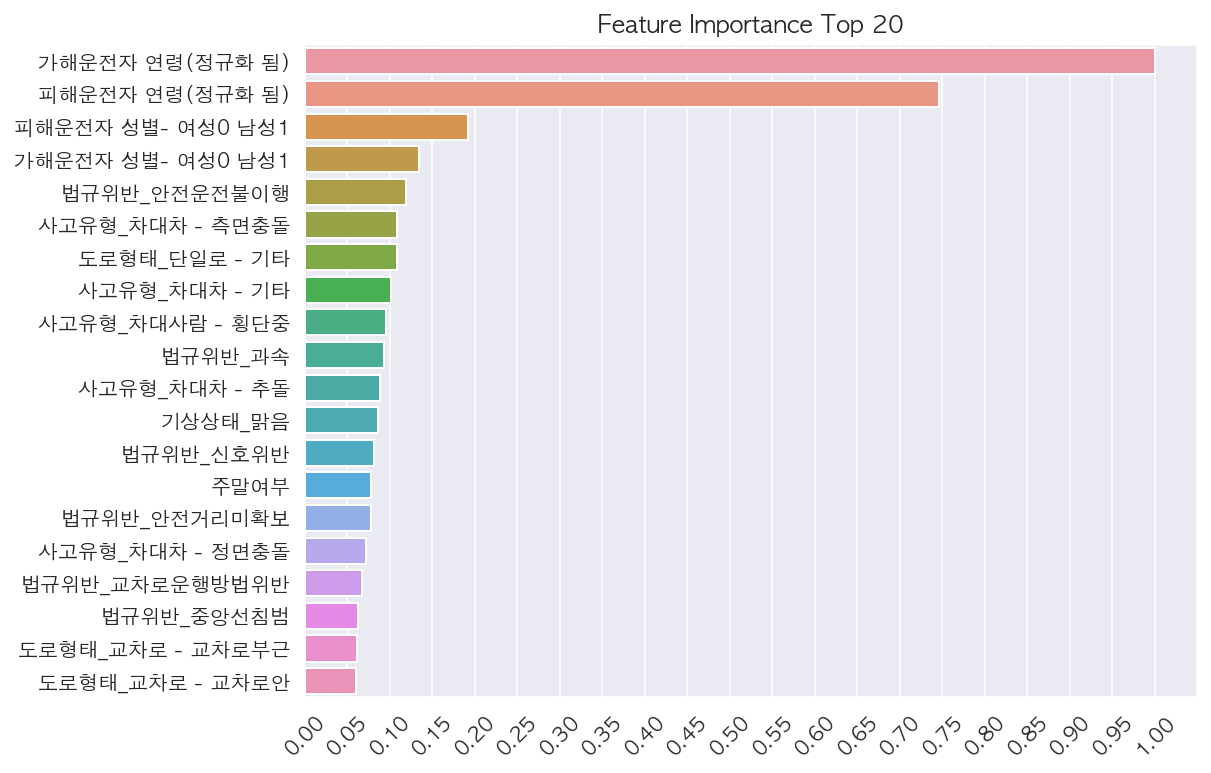


--------------------------------------
ROC_AUC는 0.8307202858346195 입니다
recall_score는 0.8428927680798005 입니다
precision_score는 0.023545802856147685 입니다
accuracy_score는 0.6378787099429042 입니다
--------------------------------------
전체 테스트셋 데이터 에서 1(사망)으로 예측한 비율은 0.36919397150352345입니다


In [12]:
#모델1. LightGBMClassifier- SMOTE 적용

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote= SMOTE(random_state=0)
X_train_over, y_train_over= smote.fit_resample(X_train,y_train)
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 셋 {X_train.shape}, {y_train.shape}')
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 셋 {X_train_over.shape}, {y_train_over.shape}')
print(f'SMOTE 적용후 레이블 값의 분포 {pd.Series(y_train_over).value_counts()}')

#X_train,y_train을 다시 학습과 검증 데이터셋으로 분리
X_tr,X_val, y_tr,y_val =train_test_split(X_train_over,y_train_over,test_size=0.3,random_state=0)

#lgbm_clf= LGBMClassifier(n_estimators=500, learning_rate=0.05)
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=64,n_jobs=-1,
                          is_unbalance = True,boost_from_average=False,learning_rate=0.05)


#lightGBM도 XGBoost와 마찬가지로 조기 중단 수행이 가능하다
evals=[(X_tr,y_tr),(X_val,y_val)]
lgbm_clf.fit(X_tr,y_tr,early_stopping_rounds=100, eval_metric='logloss',eval_set=evals,verbose=True)
y_pred= lgbm_clf.predict(X_test)
y_pred_proba= lgbm_clf.predict_proba(X_test)[:,1]

#Binarizer 적용하기
custom_threshold= 0.4
pred_proba_1= lgbm_clf.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

from preprocessing_data import f8_evaluate_model, f9_gbm_feature_importance
f9_gbm_feature_importance(lgbm_clf,X_train)
f8_evaluate_model(y_test,custom_predict,y_pred_proba)


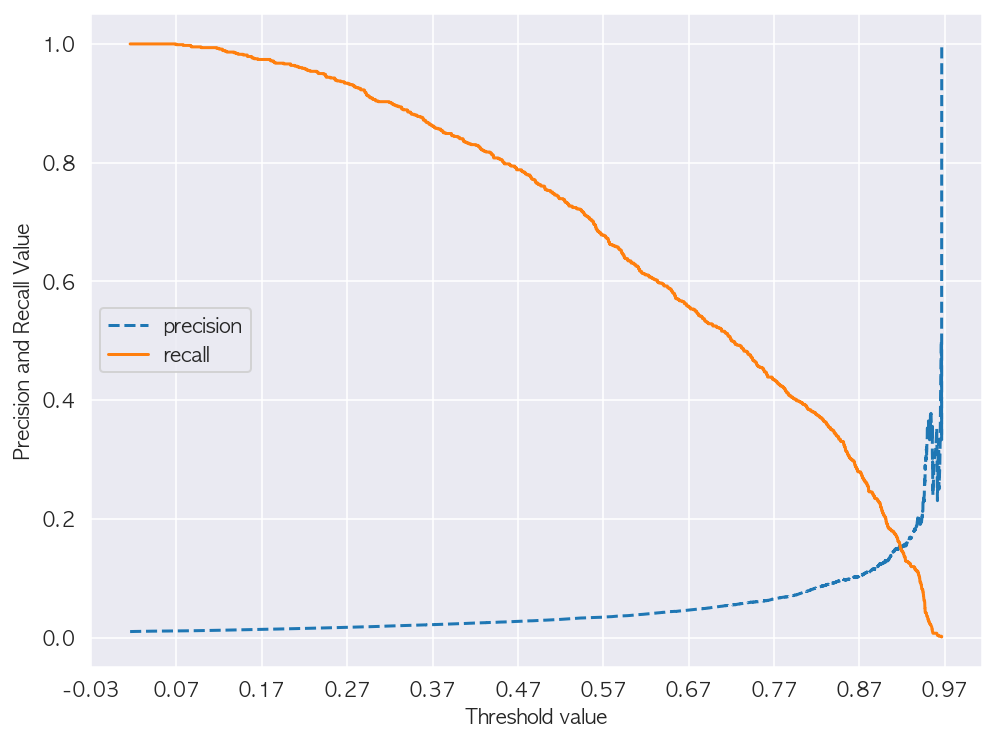

In [13]:
#모델 1 Precision-Recall Curve 시각화
from preprocessing_data import f10_precision_recall_curve_plot

f10_precision_recall_curve_plot(y_test,lgbm_clf.predict_proba(X_test)[:,1])
#나중에 xgb_boost와 lgbm을 겹쳐서 성능차이가 얼마 안난다는것을 보여주는 것도 좋을듯

## 모델2. XGBClassifier
- LightGBM보단 느리나 제시되는 feature_importance가 더 설득력 있고, 높은 정확도를 보인다

[0]	validation_0-auc:0.79572	validation_1-auc:0.77175
[1]	validation_0-auc:0.79803	validation_1-auc:0.77565
[2]	validation_0-auc:0.80289	validation_1-auc:0.77869
[3]	validation_0-auc:0.80481	validation_1-auc:0.78106
[4]	validation_0-auc:0.81199	validation_1-auc:0.78305
[5]	validation_0-auc:0.81048	validation_1-auc:0.78485
[6]	validation_0-auc:0.81192	validation_1-auc:0.78595
[7]	validation_0-auc:0.81571	validation_1-auc:0.78785
[8]	validation_0-auc:0.82231	validation_1-auc:0.79571
[9]	validation_0-auc:0.82296	validation_1-auc:0.79602
[10]	validation_0-auc:0.82429	validation_1-auc:0.79685
[11]	validation_0-auc:0.82665	validation_1-auc:0.79822
[12]	validation_0-auc:0.82843	validation_1-auc:0.79941
[13]	validation_0-auc:0.82972	validation_1-auc:0.80133
[14]	validation_0-auc:0.83078	validation_1-auc:0.80212
[15]	validation_0-auc:0.83294	validation_1-auc:0.80382
[16]	validation_0-auc:0.83411	validation_1-auc:0.80432
[17]	validation_0-auc:0.83457	validation_1-auc:0.80440
[18]	validation_0-au

/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[27]	validation_0-auc:0.84427	validation_1-auc:0.81141
[28]	validation_0-auc:0.84521	validation_1-auc:0.81189
[29]	validation_0-auc:0.84654	validation_1-auc:0.81270
[30]	validation_0-auc:0.84737	validation_1-auc:0.81343
[31]	validation_0-auc:0.84836	validation_1-auc:0.81371
[32]	validation_0-auc:0.84962	validation_1-auc:0.81391
[33]	validation_0-auc:0.85125	validation_1-auc:0.81500
[34]	validation_0-auc:0.85232	validation_1-auc:0.81562
[35]	validation_0-auc:0.85264	validation_1-auc:0.81643
[36]	validation_0-auc:0.85362	validation_1-auc:0.81707
[37]	validation_0-auc:0.85410	validation_1-auc:0.81761
[38]	validation_0-auc:0.85437	validation_1-auc:0.81832
[39]	validation_0-auc:0.85565	validation_1-auc:0.81893
[40]	validation_0-auc:0.85597	validation_1-auc:0.81959
[41]	validation_0-auc:0.85667	validation_1-auc:0.82045
[42]	validation_0-auc:0.85692	validation_1-auc:0.82091
[43]	validation_0-auc:0.85724	validation_1-auc:0.82116
[44]	validation_0-auc:0.85741	validation_1-auc:0.82155
[45]	valid

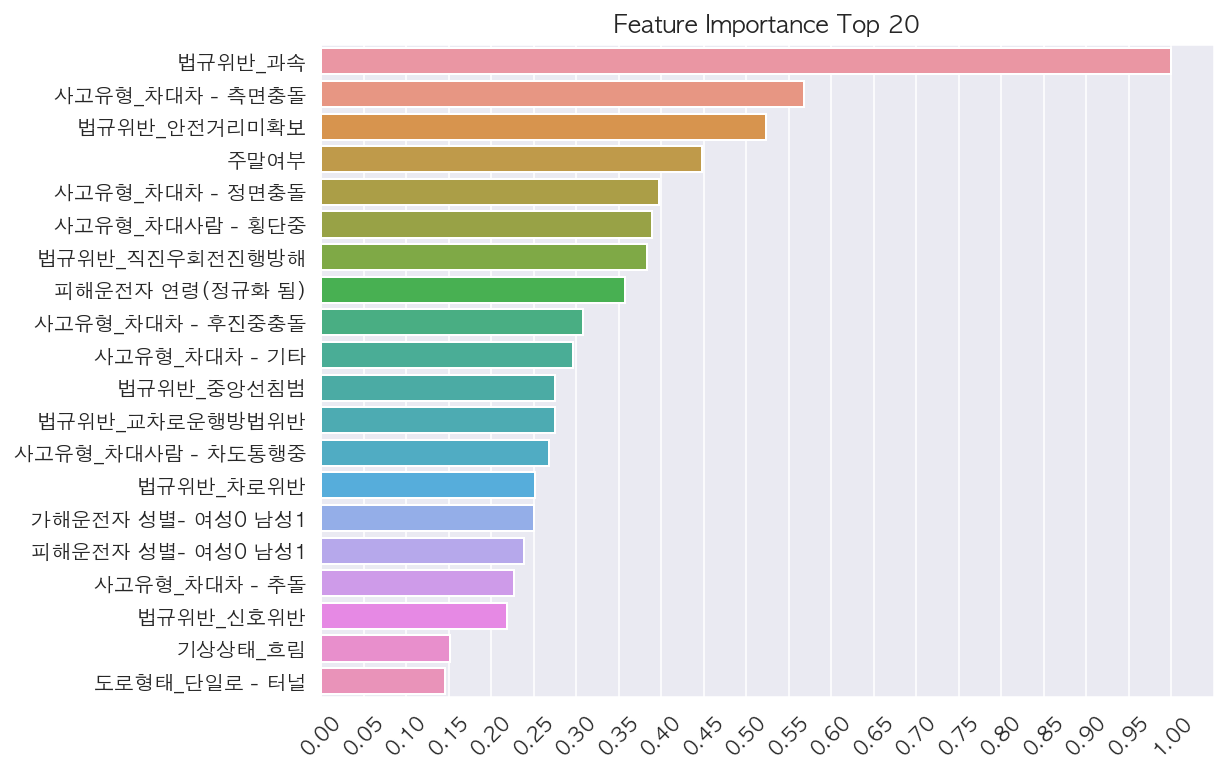


--------------------------------------
ROC_AUC는 0.8307202858346195 입니다
recall_score는 0.9314214463840399 입니다
precision_score는 0.018218623481781375 입니다
accuracy_score는 0.4816367470809115 입니다
--------------------------------------
전체 테스트셋 데이터 에서 1(사망)으로 예측한 비율은 0.5272619721207756입니다


In [14]:
#모델2. XGBclassifier

# n_estimators 는 1000, random_state는 예제 수행시마다 동일 예측 결과를 위해 설정한다
xgb_clf= XGBClassifier(n_estimators=500,learning_rate=0.05)

#성능 평가 지표를 auc로, 조기 중단 파라미터를 100으로 설정하고 학습을 수행시킨다
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='auc',eval_set=[(X_tr,y_tr),(X_val,y_val)])

#ROC의 정의: ROC, X축이 FPR( FP/(FP+TN), 음성인 것들의 수에서 양성이라 잘못 예측한 것의 비),
# 축은 TNR( TP/(FN+TP), 양성 중에서 양성이라 올바로 예측한 것의 비)
#ROC_AUC(Area Under Curve)는 보통 0.7이상이면 그럭저럭 괜찮고 0.8이면 좋은 모델이라 볼 수 있다

#Binarizer 적용하기
custom_threshold= 0.3
pred_proba_1= xgb_clf.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

#모델 평가
from preprocessing_data import f8_evaluate_model, f9_gbm_feature_importance
f9_gbm_feature_importance(xgb_clf,X_train)
f8_evaluate_model(y_test,custom_predict,y_pred_proba)

## SMOTE 오버샘플링 기법 적용하기
- 어 왜 성능이 더 떨어지지..?

SMOTE 적용 전 학습용 피처/레이블 데이터 셋 (6742, 46), (6742,)
SMOTE 적용 전 학습용 피처/레이블 데이터 셋 (6742, 46), (6742,)
SMOTE 적용후 레이블 값의 분포 0    3371
1    3371
Name: 사망사고여부, dtype: int64
[0]	validation_0-logloss:0.68002	validation_1-logloss:0.68092
[1]	validation_0-logloss:0.66814	validation_1-logloss:0.66988
[2]	validation_0-logloss:0.65733	validation_1-logloss:0.65997
[3]	validation_0-logloss:0.64743	validation_1-logloss:0.65116
[4]	validation_0-logloss:0.63823	validation_1-logloss:0.64297
[5]	validation_0-logloss:0.62976	validation_1-logloss:0.63540
[6]	validation_0-logloss:0.62209	validation_1-logloss:0.62856
[7]	validation_0-logloss:0.61464	validation_1-logloss:0.62206
[8]	validation_0-logloss:0.60766	validation_1-logloss:0.61578
[9]	validation_0-logloss:0.60149	validation_1-logloss:0.61047
[10]	validation_0-logloss:0.59552	validation_1-logloss:0.60535
[11]	validation_0-logloss:0.58975	validation_1-logloss:0.60059
[12]	validation_0-logloss:0.58475	validation_1-logloss:0.59648
[13]	validation_0-logloss:0.

/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/wooseongkyun/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[38]	validation_0-logloss:0.50848	validation_1-logloss:0.53726
[39]	validation_0-logloss:0.50644	validation_1-logloss:0.53598
[40]	validation_0-logloss:0.50527	validation_1-logloss:0.53487
[41]	validation_0-logloss:0.50365	validation_1-logloss:0.53358
[42]	validation_0-logloss:0.50237	validation_1-logloss:0.53245
[43]	validation_0-logloss:0.50102	validation_1-logloss:0.53151
[44]	validation_0-logloss:0.49996	validation_1-logloss:0.53061
[45]	validation_0-logloss:0.49830	validation_1-logloss:0.52961
[46]	validation_0-logloss:0.49643	validation_1-logloss:0.52864
[47]	validation_0-logloss:0.49550	validation_1-logloss:0.52782
[48]	validation_0-logloss:0.49462	validation_1-logloss:0.52700
[49]	validation_0-logloss:0.49306	validation_1-logloss:0.52557
[50]	validation_0-logloss:0.49224	validation_1-logloss:0.52484
[51]	validation_0-logloss:0.49039	validation_1-logloss:0.52379
[52]	validation_0-logloss:0.48944	validation_1-logloss:0.52317
[53]	validation_0-logloss:0.48815	validation_1-logloss:

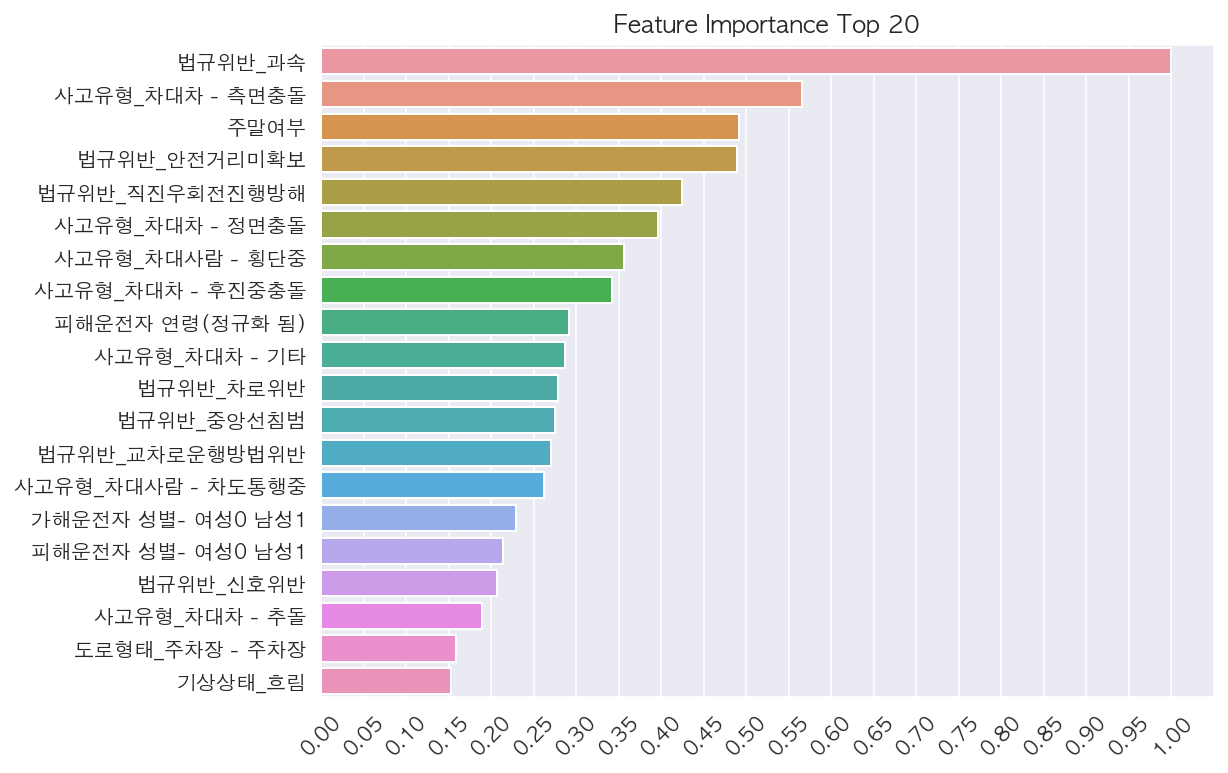


--------------------------------------
ROC_AUC는 0.8307202858346195 입니다
recall_score는 0.92643391521197 입니다
precision_score는 0.01888710948422685 입니다
accuracy_score는 0.5029190885242528 입니다
--------------------------------------
전체 테스트셋 데이터 에서 1(사망)으로 예측한 비율은 0.5058767553109408입니다


In [15]:
from imblearn.over_sampling import SMOTE

#오버샘플링을 적용한다(0과 1의 데이터 비율 편차가 심할경우 비율이 작은 쪽을 피처값을 살짝씩 변경하여 증식시키고
#0과 1의 비율을 1:1로 한다

smote= SMOTE(random_state=0)
X_train_over, y_train_over= smote.fit_resample(X_train,y_train)
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 셋 {X_train.shape}, {y_train.shape}')
print(f'SMOTE 적용 전 학습용 피처/레이블 데이터 셋 {X_train_over.shape}, {y_train_over.shape}')
print(f'SMOTE 적용후 레이블 값의 분포 {pd.Series(y_train_over).value_counts()}')

#X_train,y_train을 다시 학습과 검증 데이터셋으로 분리
X_tr,X_val, y_tr,y_val =train_test_split(X_train_over,y_train_over,test_size=0.3,random_state=0)

#모델2. XGBclassifier

# n_estimators 는 1000, random_state는 예제 수행시마다 동일 예측 결과를 위해 설정한다
xgb_clf= XGBClassifier(n_estimators=500,learning_rate=0.05)

#성능 평가 지표를 auc로, 조기 중단 파라미터를 100으로 설정하고 학습을 수행시킨다
xgb_clf.fit(X_tr,y_tr,early_stopping_rounds=100,eval_metric='logloss',eval_set=[(X_tr,y_tr),(X_val,y_val)])

#ROC의 정의: ROC, X축이 FPR( FP/(FP+TN), 음성인 것들의 수에서 양성이라 잘못 예측한 것의 비),
# 축은 TNR( TP/(FN+TP), 양성 중에서 양성이라 올바로 예측한 것의 비)
#ROC_AUC(Area Under Curve)는 보통 0.7이상이면 그럭저럭 괜찮고 0.8이면 좋은 모델이라 볼 수 있다

#Binarizer 적용하기
custom_threshold= 0.3
pred_proba_1= xgb_clf.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

#모델 평가
from preprocessing_data import f8_evaluate_model, f9_gbm_feature_importance
f9_gbm_feature_importance(xgb_clf,X_train)
f8_evaluate_model(y_test,custom_predict,y_pred_proba)

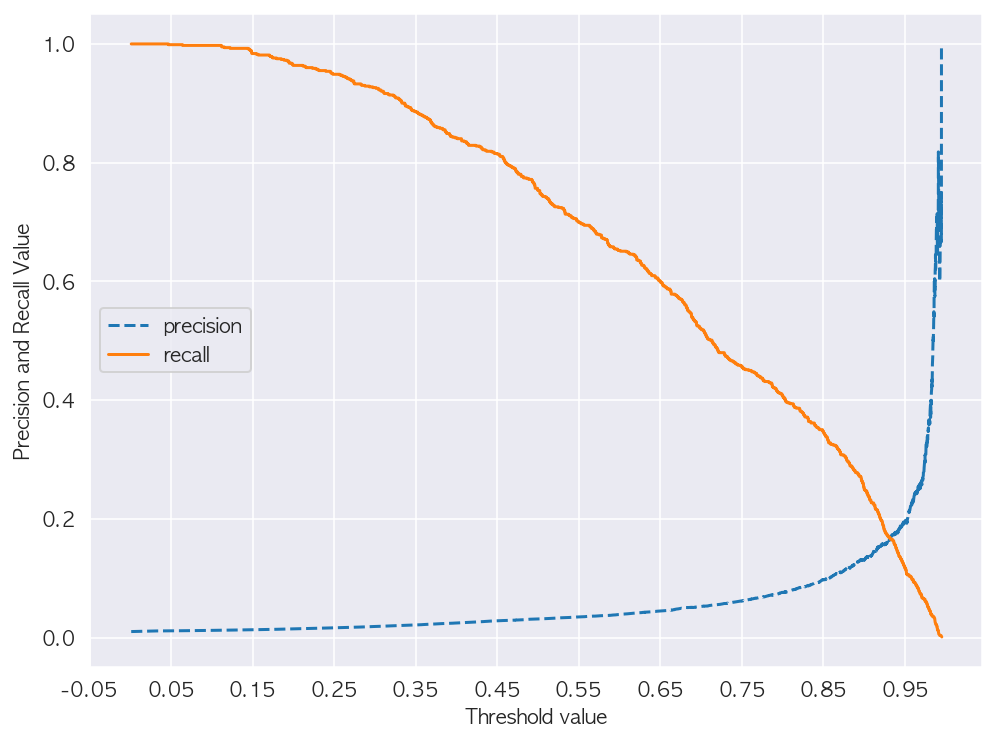

In [16]:
from preprocessing_data import f10_precision_recall_curve_plot
f10_precision_recall_curve_plot(y_test,pred_proba_1)

## 모델3. 로지스틱 회귀

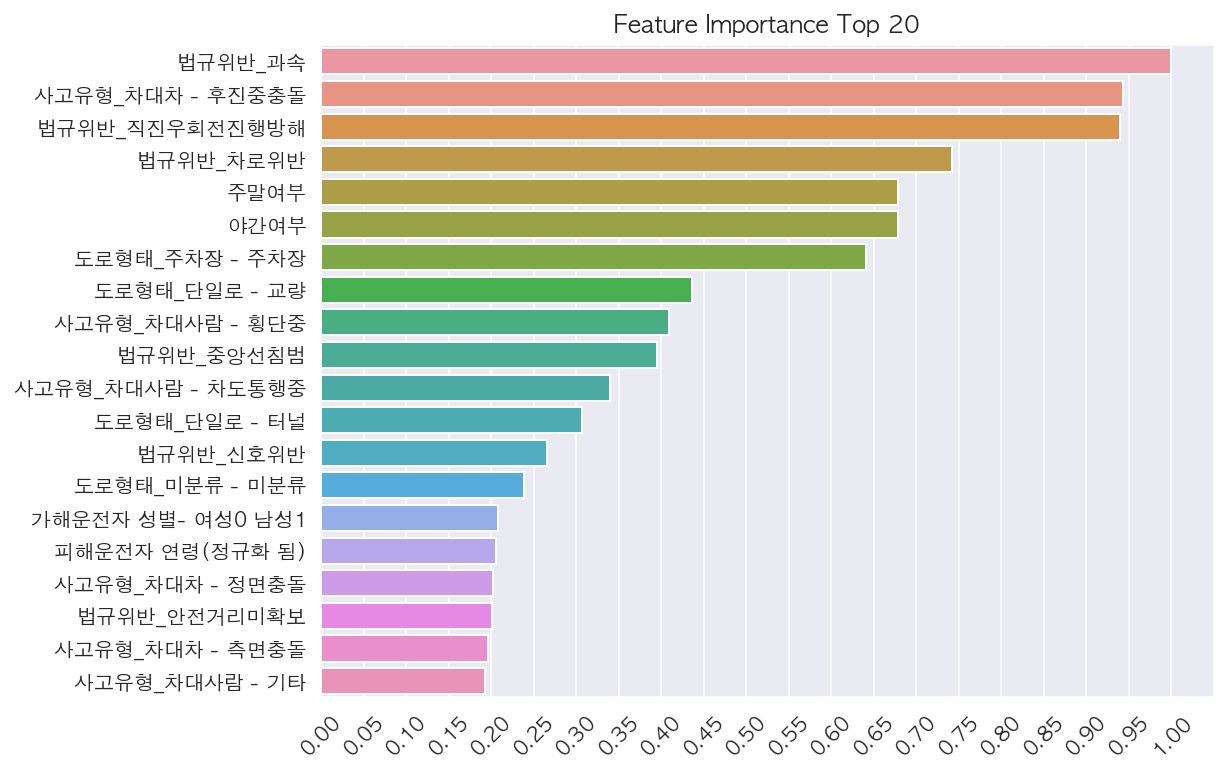


--------------------------------------
ROC_AUC는 0.8405419139710817 입니다
recall_score는 0.9276807980049875 입니다
precision_score는 0.0187850325708226 입니다
accuracy_score는 0.4995113420091559 입니다
--------------------------------------
전체 테스트셋 데이터 에서 1(사망)으로 예측한 비율은 0.5093102206676611입니다


In [17]:
from sklearn.linear_model import LogisticRegression

lr_clf= LogisticRegression(max_iter=1000)
lr_clf.fit(X_train,y_train)
y_pred= lr_clf.predict(X_test)
y_pred_proba= lr_clf.predict_proba(X_test)[:,1]

#Binarizer 적용하기
custom_threshold= 0.3
pred_proba_1= lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)
binarizer= Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict= binarizer.transform(pred_proba_1)

#모델 평가
from preprocessing_data import f8_evaluate_model, f9_logistic_feature_importance
f9_logistic_feature_importance(lr_clf,X_train)
f8_evaluate_model(y_test,custom_predict,y_pred_proba)
